# Mutiara Zalfaa Ananda Khairudin

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#1. load dataset
data= pd.read_csv('Salary_Data123.csv')

# Data Preprocessing

In [62]:
# Re-load Dataset untuk memastikan kondisi bersih
data = pd.read_csv('Salary_Data123.csv')

# Menghapus 'Job Title' (kolom yang tidak diperlukan)
data.drop(columns=['Job Title'], inplace=True, errors='ignore')

# Menghaous baris dengan missing value (null)
data.dropna(subset=['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary'], inplace=True)

# Mwmbuat mapping untuk encode 'Gender' dan 'Education Level'
gender_mapping = {'Male': 1, 'Female': 0, 'Other': 2} # Menambah 'Other'
education_mapping = {
    'High School': 1,
    "Bachelor's": 2,
    "Bachelor's Degree": 2,
    "Master's": 3,
    "Master's Degree": 3,
    'PhD': 4
}

data['Gender'] = data['Gender'].map(gender_mapping)
data['Education Level'] = data['Education Level'].map(education_mapping)

display(data.head())


,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,2.0,5.0,90000.0
1,28.0,0,3.0,3.0,65000.0
2,45.0,1,4.0,15.0,150000.0
3,36.0,0,2.0,7.0,60000.0
4,52.0,1,3.0,20.0,200000.0


In [63]:
data.isnull().sum()

,0
Age,0
Gender,0
Education Level,1
Years of Experience,0
Salary,0


In [64]:
data.dropna(subset = ['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary'], inplace=True) #Data Deletion, menghapus data yang mengandung nilai Null


In [65]:
data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Years of Experience,0
Salary,0


# Exploratory Data Analysis (EDA)

In [66]:
data.dtypes

,0
Age,float64
Gender,int64
Education Level,float64
Years of Experience,float64
Salary,float64


In [67]:
data.head(5)

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,2.0,5.0,90000.0
1,28.0,0,3.0,3.0,65000.0
2,45.0,1,4.0,15.0,150000.0
3,36.0,0,2.0,7.0,60000.0
4,52.0,1,3.0,20.0,200000.0


In [68]:
(data.sample(5))

,Age,Gender,Education Level,Years of Experience,Salary
65,38.0,0,3.0,10.0,90000.0
2835,40.0,1,3.0,16.0,150301.0
1459,38.0,1,3.0,10.0,155000.0
2834,30.0,0,3.0,5.0,102828.0
3371,23.0,0,2.0,1.0,50000.0


In [69]:
data.tail(5)

,Age,Gender,Education Level,Years of Experience,Salary
6699,49.0,0,4.0,20.0,200000.0
6700,32.0,1,1.0,3.0,50000.0
6701,30.0,0,2.0,4.0,55000.0
6702,46.0,1,3.0,14.0,140000.0
6703,26.0,0,1.0,1.0,35000.0


In [70]:
data.shape

(6697, 5)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6697 entries, 0 to 6703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6697 non-null   float64
 1   Gender               6697 non-null   int64  
 2   Education Level      6697 non-null   float64
 3   Years of Experience  6697 non-null   float64
 4   Salary               6697 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 313.9 KB


In [72]:
data.describe()

,Age,Gender,Education Level,Years of Experience,Salary
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,33.624011,0.552188,2.619382,8.095341,115328.555622
std,7.615923,0.501493,0.882155,6.060729,52793.703389
min,21.000000,0.000000,1.000000,0.000000,350.000000
25%,28.000000,0.000000,2.000000,3.000000,70000.000000
50%,32.000000,1.000000,2.000000,7.000000,115000.000000
75%,38.000000,1.000000,3.000000,12.000000,160000.000000
max,62.000000,2.000000,4.000000,34.000000,250000.000000


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frekuensi')

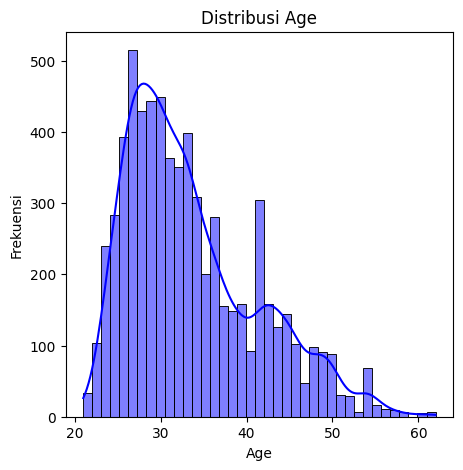

In [75]:
plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

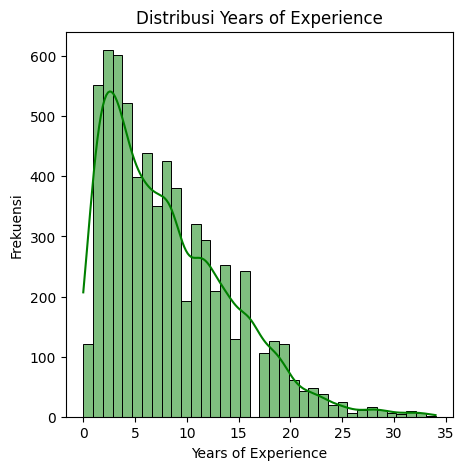

In [76]:
plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
sns.histplot(data['Years of Experience'], kde=True, color='green')
plt.title('Distribusi Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

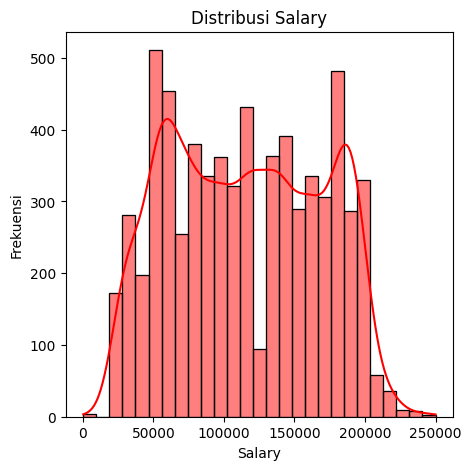

In [77]:
plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
sns.histplot(data['Salary'], kde=True, color='red')
plt.title('Distribusi Salary')
plt.xlabel('Salary')
plt.ylabel('Frekuensi')

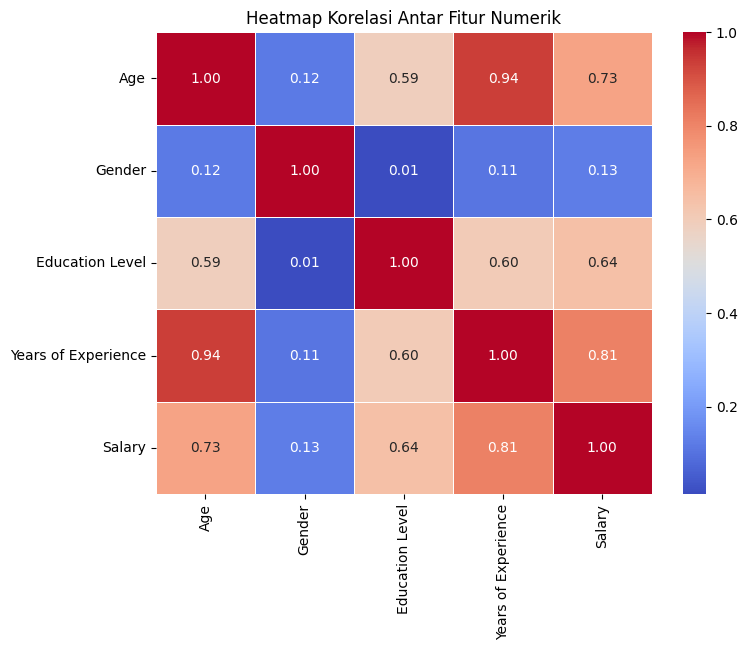

In [78]:
# Hanya kolom numerik yang digunakan untuk korelasi
numeric_data= data.select_dtypes(include=['float64', 'int64'])

# Matriks korelasi
correlation_matrix = numeric_data.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show() # Menampilkan plot

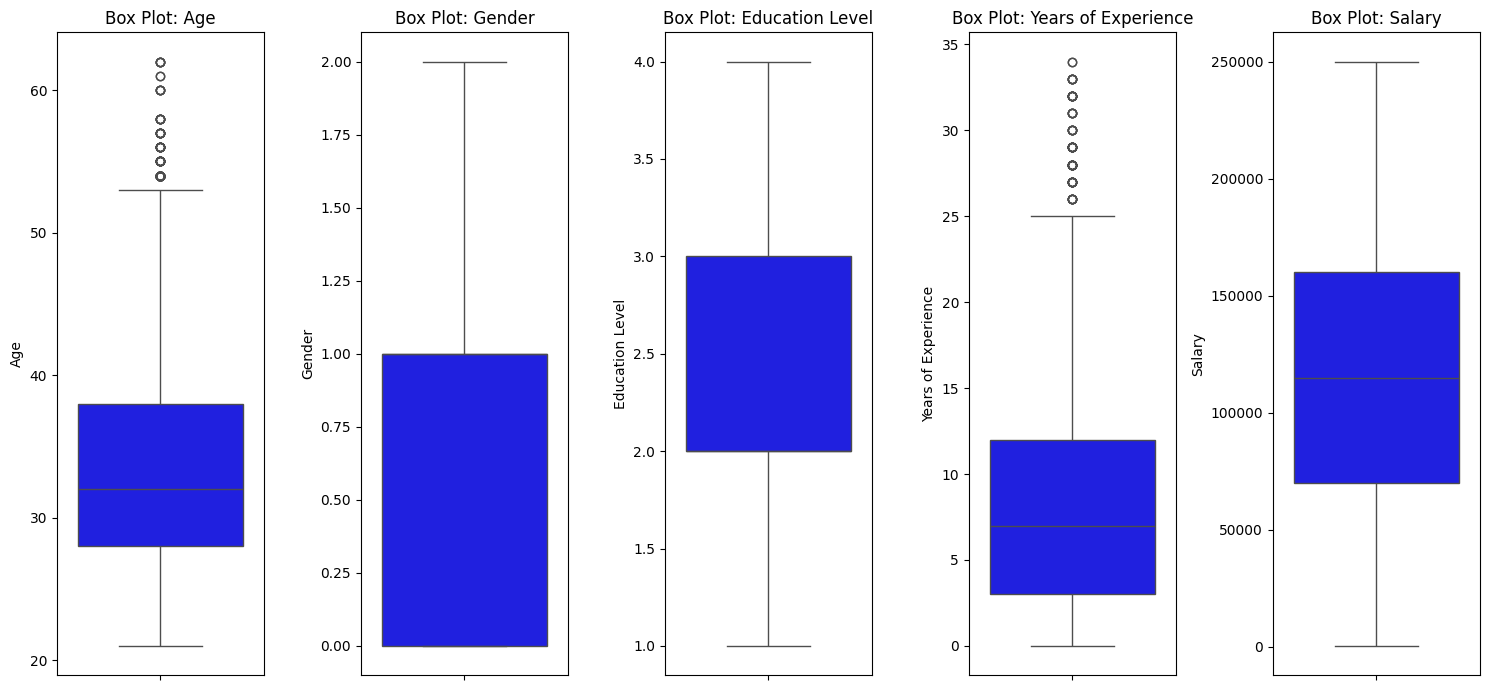

In [79]:
plt.figure(figsize=(15, 7)) #Box Plot
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(1, len(data.select_dtypes(include=['float64', 'int64']).columns), i)
    sns.boxplot(y=data[column], color='blue')
    plt.title(f'Box Plot: {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

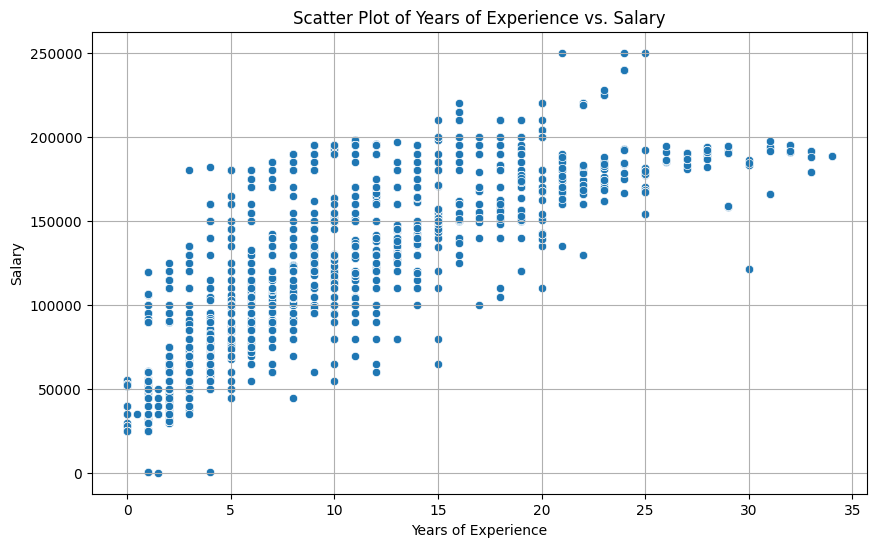

In [80]:
plt.figure(figsize=(10, 6)) #Scatter Plot
sns.scatterplot(x='Years of Experience', y='Salary', data=data)
plt.title('Scatter Plot of Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Model Machine Learning (Random Forest Regressor)

Alasan memilih Model Random Forest Regressor yaitu mampu menangkap hubungan yang tidak linear antara Age, Education Level, Years of Experience, dan Salary, sehingga hasil prediksinya lebih akurat daripada model linear, selain itu model ini tidak perlu menormalisasi data dan tahan terhadap outliers, juga lebih stabil daripada decision tree tunggal karena menggunakan banyak pohon yang digabungkan. Random Forest Regressor juga bekerja sangat baik untuk dataset kecil hingga menegah seperti dataset yang diberikan, jadi cocok digunakan pada dataset ini.

In [81]:
x = data[['Age', 'Education Level', 'Years of Experience']]  # features
y = data['Salary']  # target

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
y_pred = model.predict(x_test)

# Evaluasi Model

In [94]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse**0.5 # Calculate RMSE

print("\n--- Evaluasi Model ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


--- Evaluasi Model ---
Mean Squared Error (MSE): 280273437.49
R-squared (R2): 0.90
Root Mean Squared Error (RMSE): 16741.37


In [91]:
new_data = x_test.iloc[[0]] # Take the first sample from x_test as new data for demonstration
predicted_salary_rf = model.predict(new_data)
print("\n--- Contoh Prediksi Baru dengan Random Forest Model ---")
print(f"Predicted Salary for {new_data.iloc[0].to_dict()}: {predicted_salary_rf[0]:.2f}")


--- Contoh Prediksi Baru dengan Random Forest Model ---
Predicted Salary for {'Age': 36.0, 'Education Level': 3.0, 'Years of Experience': 9.0}: 128399.02


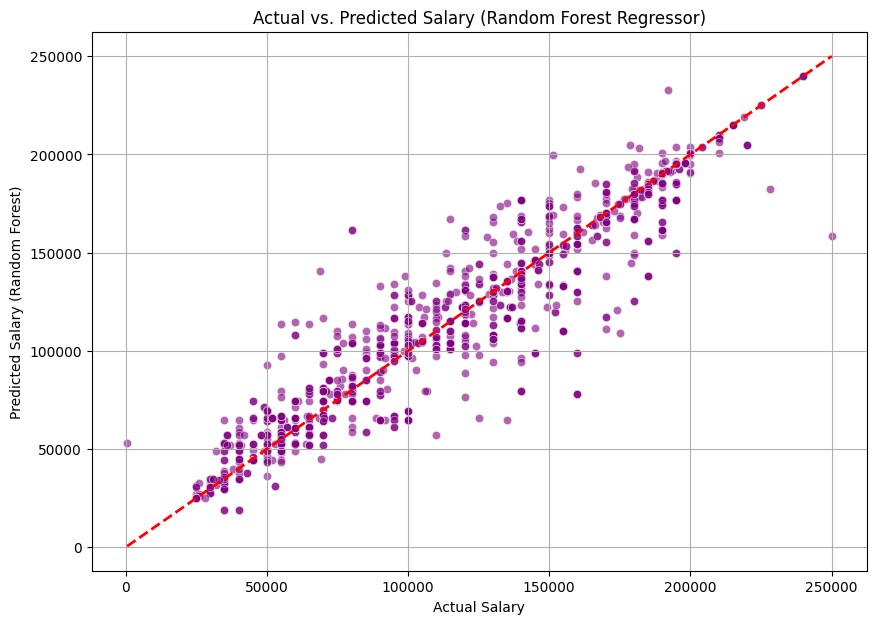

In [92]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.title('Actual vs. Predicted Salary (Random Forest Regressor)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary (Random Forest)')
plt.grid(True)
plt.show()